* Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.image as mpimg
import cv2
import sklearn
import random

* Setting Data Set

In [2]:
imgPath = [] # This is an empyt list for images's paths

In [3]:
path = "/home/kamber/Desktop/KamberAgcan/Python/Age Prediction/AgePredictionDataset/train"
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        imgPath.append(os.path.join(dirname, filename)) # The paths read from the file are thrown into the created empty list.
imgPath = np.asarray(imgPath)  # Converted to list array format containing paths.
print(imgPath.shape,type(imgPath))

(33432,) <class 'numpy.ndarray'>


In [4]:
imgShape = imgPath.shape[0] # The shape of the imgPath array is assigned to a variable named imgShape in order to use it in loops.
print("imgShape: ",imgShape,type(imgShape))

imgShape:  33432 <class 'int'>


In [5]:
random.shuffle(imgPath)    # Since the size of the images in the data set is large, 5000 images were randomly selected, 
                           # and training will be made with these selected images.

In [6]:
def loopsAndframe(imgShape,imgPath):
    
    # Empyt lists
    whatkindofimage = []                     
    imgName = []     
    Age =[]

    # For loop
    for i in range(0,imgShape):
        a = path.split("/")[8]       # We dynamically determine whether the test image or the train image.
        whatkindofimage.append(a)

        b = imgPath[i].split("/")[10]  # The names of the images were determined from the path using the split method.
        imgName.append(b) 

        c = imgPath[i].split("/")[9] # The ages of the images were determined.
        Age.append(c)
    
    # Create data frame
    c1 = pd.Series(whatkindofimage)
    c2 = pd.Series(imgName)
    c3 = pd.Series(Age)
    c4 = pd.Series(imgPath)

    data_ = dict(whatkindofimage = c1,imgName = c2,Age = c3, imgPath = c4) # The created columns are added to the dataframe.
    df = pd.DataFrame(data_)
    return df

In [7]:
loopsAndframe(imgShape,imgPath).head()

,whatkindofimage,imgName,Age,imgPath
0,train,152419.jpg,45,/home/kamber/Desktop/KamberAgcan/Python/Age Pr...
1,train,154129.jpg,22,/home/kamber/Desktop/KamberAgcan/Python/Age Pr...
2,train,137425.jpg,47,/home/kamber/Desktop/KamberAgcan/Python/Age Pr...
3,train,176824.jpg,34,/home/kamber/Desktop/KamberAgcan/Python/Age Pr...
4,train,140261.jpg,42,/home/kamber/Desktop/KamberAgcan/Python/Age Pr...


* Imread and Imshow methods for images

In [8]:
def imreading(images_index):    #  To read the images with the imread method, a method has been developed to get the index of the path in the name of imread,
    x = imgPath[images_index]   #  and read the photo in the desired index in array format.
    y = plt.imread(x)
    return y

In [9]:
imreading(0)

array([[[186, 186, 186],
        [198, 198, 198],
        [210, 210, 210],
        ...,
        [214, 214, 214],
        [215, 215, 215],
        [216, 216, 216]],

       [[187, 187, 187],
        [197, 197, 197],
        [209, 209, 209],
        ...,
        [211, 211, 211],
        [212, 212, 212],
        [213, 213, 213]],

       [[188, 188, 188],
        [197, 197, 197],
        [206, 206, 206],
        ...,
        [209, 209, 209],
        [210, 210, 210],
        [211, 211, 211]],

       ...,

       [[218, 218, 218],
        [214, 214, 214],
        [205, 205, 205],
        ...,
        [123, 123, 123],
        [ 43,  43,  43],
        [ 28,  28,  28]],

       [[218, 218, 218],
        [213, 213, 213],
        [204, 204, 204],
        ...,
        [124, 124, 124],
        [ 45,  45,  45],
        [ 28,  28,  28]],

       [[219, 219, 219],
        [213, 213, 213],
        [203, 203, 203],
        ...,
        [125, 125, 125],
        [ 46,  46,  46],
        [ 27,  27,  27]]

In [10]:
loopsAndframe(imgShape,imgPath).whatkindofimage[0]

'train'

In [11]:
def imshowing(index):                # Developed a method called imshowing to read images.
    x = imgPath[index]               # With determined index, the photo in the desired order in the path can be visualized.
    y = ("Age =",loopsAndframe(imgShape,imgPath).Age[index]) # the age in the photograph was written to x axis.
    z = (loopsAndframe(imgShape,imgPath).whatkindofimage[0],loopsAndframe(imgShape,imgPath).imgName[index])               
    k = mpimg.imread(x) 
    plt.imshow(k)  
    plt.title(z)                     # The name of the visualized photo is printed in the title section.
    #plt.axis("off")
    plt.xlabel(y)
    plt.show()

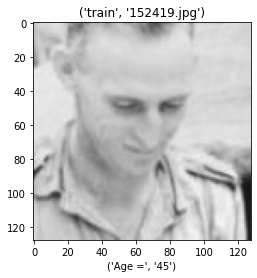

In [12]:
imshowing(0)

In [13]:
# empty list for outputs
model_img1 = []
model_img = []
model_age = []

for i in range(0,3000):                       # The interval should be determined with how many images will be trained.                      
    a = imgPath[i]                           
    model_img1.append(a)                    # Creating images and labels with loop
    b = cv2.imread(model_img1[i])
    model_img.append(b)
    
    c = (loopsAndframe(imgShape,imgPath)["Age"][i])
    d = cv2.imread(model_img1[i])
    model_age.append(int(c))
    
print("model_img",type(model_img[0]))
print("model_age",type(model_age[0]))

model_img <class 'numpy.ndarray'>
model_age <class 'int'>


In [14]:
# model_age = []
# for i in range(0,300):
#     c = (loopsAndframe(imgShape,imgPath)["Age"][i])
#     #d = cv2.imread(model_img1[i])
#     model_age.append(int(c))
# print("model_age",type(model_age[0]))

In [15]:
model_age[0]

45

In [16]:
model_img = np.asarray(model_img)
print(model_img.shape)

(3000, 128, 128, 3)


In [17]:
X = np.asarray(model_img)
print(X.shape,type(X))

(3000, 128, 128, 3) <class 'numpy.ndarray'>


In [18]:
X = X.reshape(-1,128,128,3).astype("float") # setting images entries for model
print(X.shape,type(X))

(3000, 128, 128, 3) <class 'numpy.ndarray'>


/home/kamber/anaconda3/envs/myenv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


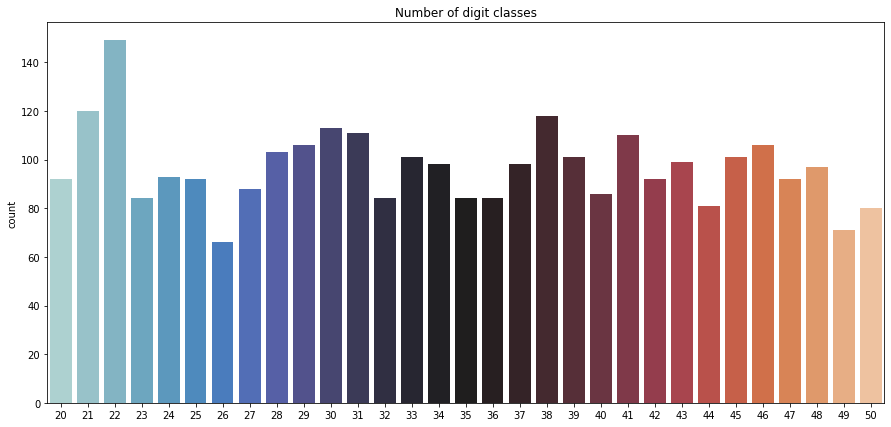

In [19]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
sns.countplot(model_age, palette="icefire")
plt.title("Number of digit classes")
plt.show()

In [20]:
Y = np.asarray(model_age).reshape(-1,1) #setting label entries for model
print(Y.shape,type(Y))

(3000, 1) <class 'numpy.ndarray'>


In [21]:
# normalization
X = X/255.0
Y = Y/255.0
print(X.shape,type(X))
print(Y.shape,type(Y))

(3000, 128, 128, 3) <class 'numpy.ndarray'>
(3000, 1) <class 'numpy.ndarray'>


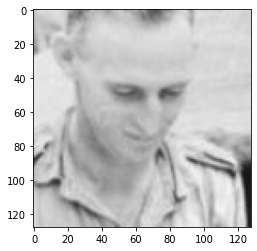

In [22]:
plt.imshow(X[0])           #view of the same image after normalization
plt.show()

In [23]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y = to_categorical(Y, num_classes = 51)
print(Y.shape)

(3000, 51)


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X,Y, test_size = 0.10,random_state = 42)
print("X_train.shape",X_train.shape,type(X_train))
print("X_val.shape",X_val.shape,type(X_val))
print("Y_train.shape",Y_train.shape,type(Y_train))
print("Y_val.shape",Y_val.shape,type(Y_val))

X_train.shape (2700, 128, 128, 3) <class 'numpy.ndarray'>
X_val.shape (300, 128, 128, 3) <class 'numpy.ndarray'>
Y_train.shape (2700, 51) <class 'numpy.ndarray'>
Y_val.shape (300, 51) <class 'numpy.ndarray'>


In [25]:
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential,load_model,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,ZeroPadding2D,Activation
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,BatchNormalization,Flatten,Input

In [26]:
model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5), padding = "Same", activation = "relu", input_shape = (128,128,3)))
model.add(Conv2D(140,(3,3),activation="relu"))
model.add(Conv2D(130,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(120,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(51))
model.add(Activation("softmax"))

In [27]:
optimizer = Adam(lr = 0.001,beta_1 = 0.9, beta_2 = 0.999)
          # "rmsprop"

/home/kamber/anaconda3/envs/myenv/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [28]:
# Compile the Model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])
                                   # loss = "categorical_crossentropy" - "binary_crossentropy"  - "sparse_categorical_crossentropy"

# Epochs and Batch Size
epochs = 10 # for better result increase the epochs
batch_size = 100
    
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [29]:
# fit the model
history = model.fit(datagen.flow(X_train,Y_train,batch_size = batch_size), epochs = epochs, 
                              validation_data = (X_val,Y_val), steps_per_epoch = X_train.shape[0]// batch_size)

Epoch 1/10
27/27 [==============================] - 1981s 73s/step - loss: 2.6089 - accuracy: 0.7676 - val_loss: 14.5598 - val_accuracy: 0.0000e+00
Epoch 2/10
27/27 [==============================] - 1840s 69s/step - loss: 0.1151 - accuracy: 0.9954 - val_loss: 45.3696 - val_accuracy: 0.0000e+00
Epoch 3/10
27/27 [==============================] - 1818s 68s/step - loss: 0.0385 - accuracy: 0.9989 - val_loss: 73.4163 - val_accuracy: 0.0000e+00
Epoch 4/10
27/27 [==============================] - 1817s 67s/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 119.8785 - val_accuracy: 0.0000e+00
Epoch 5/10
27/27 [==============================] - 1799s 67s/step - loss: 0.0025 - accuracy: 0.9986 - val_loss: 134.9319 - val_accuracy: 0.0000e+00
Epoch 6/10
27/27 [==============================] - 1785s 66s/step - loss: 0.0095 - accuracy: 0.9993 - val_loss: 155.9855 - val_accuracy: 0.0000e+00
Epoch 7/10
27/27 [==============================] - 1785s 66s/step - loss: 0.0188 - accuracy: 0.9987 - val_lo

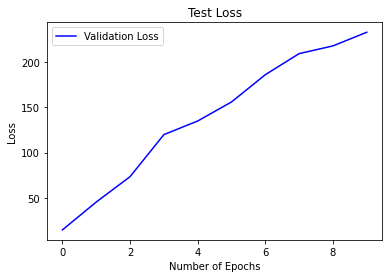

In [30]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="Validation Loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

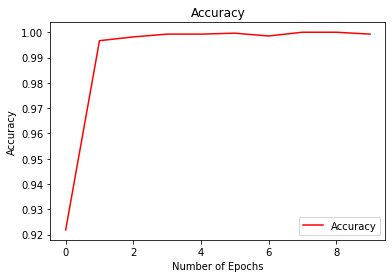

In [31]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['accuracy'], color='r', label="Accuracy")
#plt.plot(history.history["val_accuracy,"],color = "r",label = "val_accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [1]:
model.save("Age_load_model.h5")

NameError: name 'model' is not defined